### 1.机器学习基础操作线性模型

- 数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。

In [351]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"./data/bike.csv")

- id属性对构建回归预测模型没有帮助，请剔除掉该列。

In [352]:
data = data.drop('id',axis=1)#去除id列

- 我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

In [353]:
data = data[data['city']==1]#筛选出上海的数据
data = data.drop('city',axis=1)#删除city列

- 为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

In [354]:
#这里变为0的在前，否则不能正确转换
data.loc[(data['hour']<=5)|(data['hour']>=19),'hour']=0
data.loc[(data['hour']>=6)&(data['hour']<=18),'hour']=1

- y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。

In [355]:
y = np.array(data['y'])
y = y.astype(np.float64)
data = data.drop('y',axis=1)

- 请将DataFrame对象转换为Numpy数组，方便后续操作。

In [356]:
x = np.array(data)

- 请按照训练集与测试集8:2的比例将原始数据集划分。

In [357]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=np.random.randint(1,100000000))

- 请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

In [358]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_test=min_max_scaler.fit_transform(x_test)
x_train=min_max_scaler.fit_transform(x_train)

#由于MinMaxScaler只能对二维数组归一化，所以自己写一个向量归一化函数
def MinMaxVec(datas):#对向量归一化
    maxs=datas.max()
    mins=datas.min()
    for i in range(len(datas)):
        datas[i]=(datas[i]-mins)/(maxs-mins)
MinMaxVec(y_test)
MinMaxVec(y_train)

- 请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

In [359]:
from sklearn.linear_model import LinearRegression
mode = LinearRegression()
mode.fit(x_train,y_train)#模型训练

LinearRegression()

- 利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。

In [360]:
#将测试集传入，得到预测值
predict = mode.predict(x_test)
predict

array([ 2.11947822e-01,  7.72773708e-02,  2.66448152e-01,  2.19164262e-01,
        2.26736192e-01,  4.06314903e-02,  1.96855267e-01,  1.78044358e-01,
        2.26072459e-01,  5.01294065e-02,  2.35121416e-01,  2.36739406e-01,
        1.75409693e-01,  1.74534794e-01,  3.06955950e-01,  1.42287711e-01,
        4.37566517e-01,  2.87357470e-01,  4.11489986e-01,  2.43101615e-01,
        2.53509676e-01,  1.14854730e-01,  1.04320382e-01,  1.13289610e-01,
        2.98785951e-01,  2.80710633e-01,  1.78744704e-01,  2.05959226e-01,
        2.54923387e-01,  2.18397359e-01,  3.42681630e-01,  3.83574207e-01,
        7.45465101e-02,  1.68934367e-01,  1.02300756e-01,  3.16157604e-01,
        4.36655457e-01,  2.07944518e-01,  3.68610315e-01,  1.49069946e-01,
        2.29837274e-01,  2.21118095e-01,  4.02412763e-01,  5.98524472e-02,
        1.60313750e-01,  2.14594743e-01,  1.15274235e-01,  3.97037459e-01,
        4.49151007e-01,  5.14803899e-02,  4.55785743e-01,  3.29762909e-01,
        1.68624070e-01,  

- 模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [361]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predict))
print("RMSE为:{}".format(RMSE))

RMSE为:0.17440693730597043


### 利用K近邻算法学习鸢尾花数据集

- 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

In [362]:
from sklearn import datasets
#加载数据
iris_data = datasets.load_iris()
x = iris_data.data
y=iris_data.target
#划分数据
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)
#iris_data.target
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- 以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图

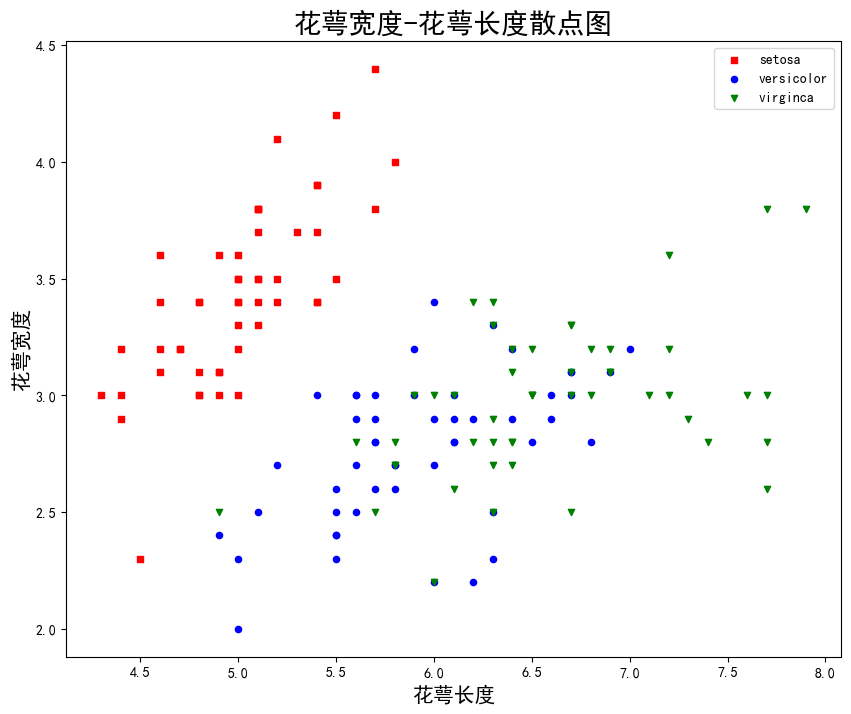

In [363]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
iris = pd.DataFrame(iris_data.data,columns=['sepal length','sepal width','petal length','petal width'])
#这个数据集每种花有50组数据
plt.figure(figsize=(10,8))
plt.title("花萼宽度-花萼长度散点图",fontsize=20)
plt.xlabel("花萼长度",fontsize=15)
plt.ylabel("花萼宽度",fontsize=15)
#ax=iris.iloc[:50].plot.scatter('sepal length','sepal width',s=20,marker='s',c='red',label='setosa')
plt.scatter(iris.iloc[:50]['sepal length'],iris.iloc[:50]['sepal width'],s=20,marker='s',c='red',label='setosa')
#iris.iloc[50:100].plot.scatter('sepal length',"sepal width",s=20,marker='o',c='pink',label='versicolor',ax=ax)
plt.scatter(iris.iloc[50:100]['sepal length'],iris.iloc[50:100]['sepal width'],s=20,marker='o',c='blue',label='versicolor')
#iris.iloc[100:].plot.scatter('sepal length',"sepal width",s=20,marker='v',c='skyblue',label='virginca',ax=ax)
plt.scatter(iris.iloc[100:]['sepal length'],iris.iloc[100:]['sepal width'],s=20,marker='v',c='green',label='virginca')
plt.legend()
plt.show()

- 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2

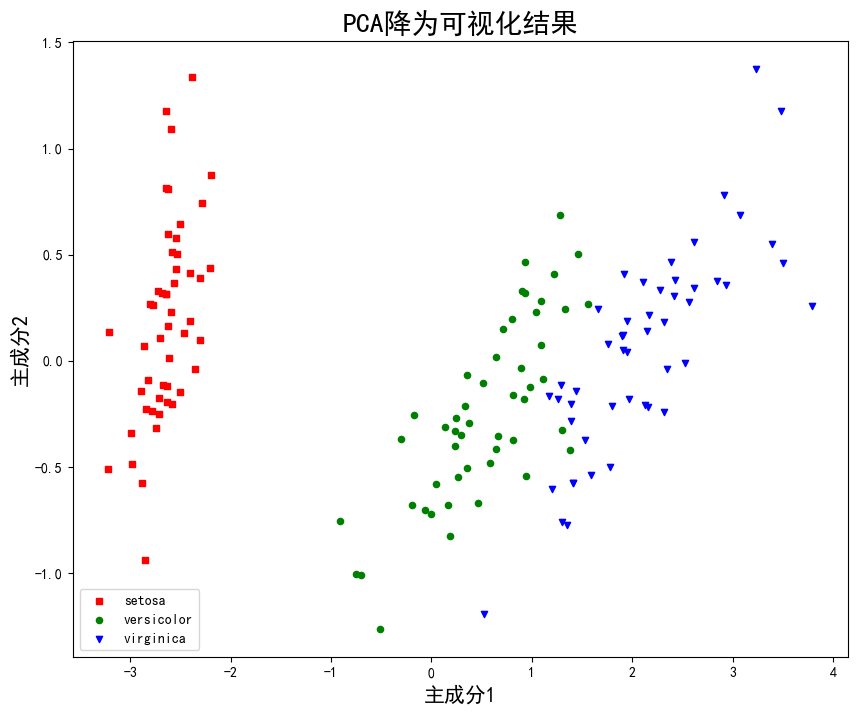

In [364]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris_data.data)
iris_decom = pca.transform(iris_data.data)
x_test = pca.transform(x_test)
x_train = pca.transform(x_train)
labels = ['setosa', 'versicolor', 'virginica']
markers = ['s','o','v']
colors = ['r','g','b']
plt.figure(figsize=(10,8))
plt.title("PCA降为可视化结果",fontsize=20)
plt.xlabel("主成分1",fontsize=15)
plt.ylabel("主成分2",fontsize=15)
for i in range(150):
    if i%50==0:
        plt.scatter(iris_decom[i][0],iris_decom[i][1],label=labels[i//50],s=20,c=colors[i//50],marker=markers[i//50])
    else:
        plt.scatter(iris_decom[i][0],iris_decom[i][1],s=20,c=colors[i//50],marker=markers[i//50])
plt.legend()
plt.show()

- 以K=3训练分类器

In [365]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X=x_train,y=y_train)

KNeighborsClassifier(n_neighbors=3)

- 在测试集上进行测试，最后输出分类准确率

In [366]:
y_predict = knn.predict(x_test)
#y_predict=y_predict.reshape(-1,1)
print("分类结果：\n",y_predict)
print("准确率：{}".format(knn.score(x_test,y_test)))

分类结果：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 1 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 2 2 2 1 0 0 2 2 0 0 0 2 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1]
准确率：0.9666666666666667
